In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
!ls ../datasets_full/London
!echo "---- * ----"
!ls ../datasets_full/Rio
!echo "---- * ----"
!ls ../datasets_full/Vancouver


UK_inflation.csv                    london_taxpayer_income.csv
UK_international-visits.csv         london_ticket_sales.csv
london_earnings_by_borough.csv      london_tickets_for_sale.csv
london_economic_activity.csv        london_underground_activity.csv
london_infrastructure_spending.csv  london_underground_station_info.csv
london_sports_participation.csv
---- * ----
brazil_gdp.csv                    brazil_tourism_jobs.csv
brazil_international_arrivals.csv brazil_unemployment.csv
brazil_monthly_income.csv
---- * ----
region_codes.csv
vancouver_business_size.csv
vancouver_employment_by_industry.csv
vancouver_employment_by_industry_legend.csv
vancouver_room_revenues_2000_2010.csv
vancouver_room_revenues_2010_2019.csv
vancouver_small_business_by_region.csv
vancouver_turism_indicators.csv
vancouver_visits.csv


# London

In [2]:
london_root = "../datasets_full/London/"
inflation = pd.read_csv(london_root + "UK_inflation.csv") 
# inflation.head()

In [3]:
""" 
2002 - 2019
golds:
1) 计算consumption
risks:
1) sample感觉有问题？为什么乘上1000后还是float？
"""
inter_visist = pd.read_csv(london_root+"UK_international-visits.csv")
inter_visist = inter_visist[inter_visist['year'] != '2019P']
inter_visist['year'] = inter_visist['year'].astype(int)
inter_visist = inter_visist[inter_visist.year < 2015] 
inter_visist.head()

/Users/adam/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,year,quarter,market,dur_stay,mode,purpose,area,visits,spend,nights,sample
0,2002,January-March,Belgium,1-3 nights,Air,Holiday,TOTAL ENGLAND,4.431616,1.013484,9.530416,6
1,2002,January-March,Belgium,1-3 nights,Air,Holiday,LONDON,3.572186,0.969138,6.954456,5
2,2002,January-March,Belgium,1-3 nights,Air,Holiday,REST OF ENGLAND,0.859430,0.044346,2.575960,1
3,2002,January-March,Belgium,1-3 nights,Air,Holiday,SOUTHERN ENGLAND,0.859430,0.044346,2.575960,1
4,2002,January-March,Belgium,1-3 nights,Air,Holiday,SOUTH EAST,0.859430,0.044346,2.575960,1


In [4]:
inter_visist['quarter'].replace({'January-March': 1,
                                 'April-June': 4,
                                 'July-September': 7,
                                 'October-December': 10}, 
                                 inplace=True)

In [88]:
inter_visist[['visits', 'spend']].corr()

,visits,spend
visits,1.000000,0.694318
spend,0.694318,1.000000


In [5]:
inter_visist['purpose'].value_counts()

VFR              126577
Holiday          114344
Business          97291
Miscellaneous     49582
Study             20259
Name: purpose, dtype: int64

In [6]:
inter_visist['dur_stay'].value_counts()

1-3 nights     114279
4-7 nights     112361
8-14 nights     91127
15+ nights      89870
Not Known         416
Name: dur_stay, dtype: int64

In [7]:
holiday_visist = inter_visist[inter_visist.purpose == 'Holiday']

In [8]:
holiday_visist['dur_stay'].value_counts()

4-7 nights     33657
8-14 nights    29897
1-3 nights     26918
15+ nights     23768
Not Known        104
Name: dur_stay, dtype: int64

In [9]:
holiday_visist['market'].unique()

array(['Belgium', 'Luxembourg', 'France', 'Germany', 'Italy',
       'Netherlands', 'Denmark', 'Greece', 'Spain', 'Portugal', 'Austria',
       'Sweden', 'Finland', 'Irish Republic', 'Turkey', 'Switzerland',
       'Norway', 'Iceland', 'Czech Republic', 'Poland', 'Hungary',
       'Russia', 'Other Western Europe', 'Other Eastern Europe', 'USA',
       'Canada', 'Mexico', 'Brazil', 'Argentina',
       'Other Central & South America', 'Hong Kong', 'Malaysia',
       'Thailand', 'Singapore', 'Taiwan', 'China', 'Other Asia', 'Japan',
       'South Korea', 'Australia', 'New Zealand', 'United Arab Emirates',
       'Saudi Arabia', 'Kuwait', 'Other Middle East', 'Egypt', 'Israel',
       'India', 'Pakistan', 'South Africa', 'Other Southern Africa',
       'Nigeria', 'Kenya', 'Other Africa', 'Bulgaria', 'Romania',
       'Serbia', 'Chile', 'Indonesia', 'Bahrain', 'Oman', 'Qatar'],
      dtype=object)

In [10]:
inter_visist.area.unique()

array(['TOTAL ENGLAND', 'LONDON', 'REST OF ENGLAND', 'SOUTHERN ENGLAND',
       'SOUTH EAST', 'SCOTLAND', 'ALL STAYING VISITS',
       "ENGLAND'S NORTH COUNTRY", 'CENTRAL ENGLAND', 'NORTH EAST',
       'NORTH WEST', 'WEST MIDLANDS', 'EAST MIDLANDS', 'EAST OF ENGLAND',
       'SOUTH WEST', 'YORKSHIRE', 'WALES', ' NORTHERN IRELAND',
       ' OIL RIGS/TRAVELLING', ' ISLE OF MAN', ' CHANNEL ISLANDS'],
      dtype=object)

In [11]:
london_holiday_visist = holiday_visist[inter_visist.area == 'LONDON']
london_holiday_visist = london_holiday_visist.groupby(['year', 'quarter'])[['spend', 'visits']].sum()

/Users/adam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [12]:
london_holiday_visist_d = london_holiday_visist.shift(4)
london_holiday_visist['spend_rate'] = london_holiday_visist['spend'] / london_holiday_visist_d['spend'] - 1
london_holiday_visist['visits_rate'] = london_holiday_visist['visits'] / london_holiday_visist_d['visits'] - 1 

In [13]:
index = list(map(lambda x: str(x), london_holiday_visist['visits_rate'].index.values))

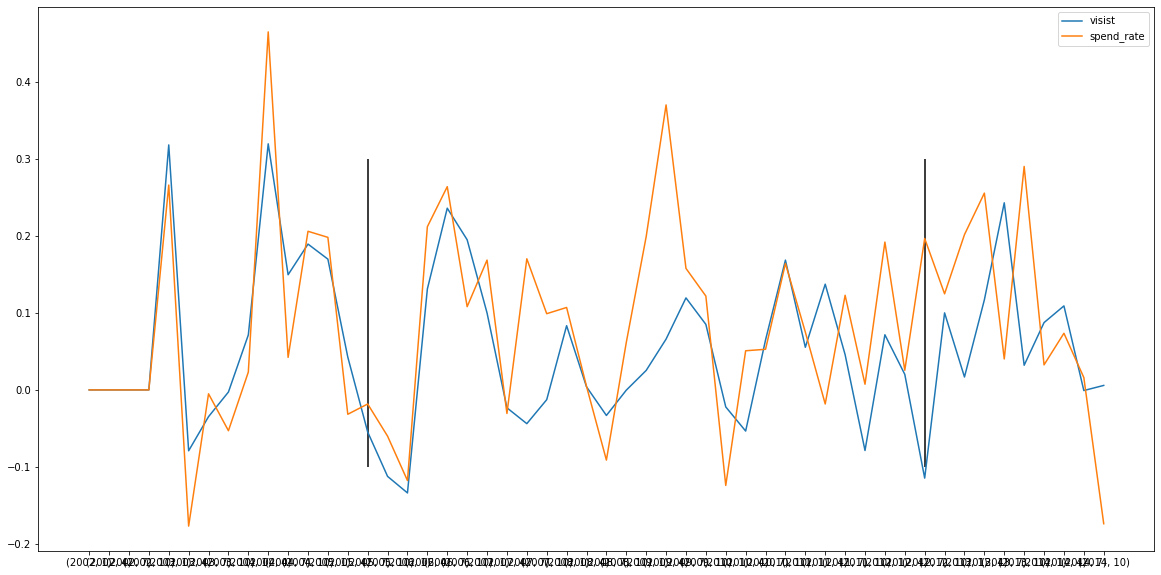

In [14]:
""" 以holiday为目的的增长率的plot
insight: 在时间维度上，可能存在reallocation effect. 但是如何量化？
"""
y = london_holiday_visist['visits_rate'].fillna(0).values
y2 = london_holiday_visist['spend_rate'].fillna(0).values
plt.figure(figsize=(20, 10))
plt.plot(index, y, label='visist')
plt.plot(index, y2, label='spend_rate')
plt.vlines("(2012, 7)", -0.1, 0.3)
plt.vlines("(2005, 7)", -0.1, 0.3)
plt.legend()

In [18]:
""" 以来的长短来区分 """
london_holiday_visist_dur_stay = holiday_visist[inter_visist.area == 'LONDON']
london_holiday_visist_dur_stay = london_holiday_visist_dur_stay.groupby(['year', 'quarter', "dur_stay"])[['spend', 'visits']].sum()
london_holiday_visist_dur_stay = london_holiday_visist_dur_stay.unstack(level='dur_stay')

/Users/adam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [19]:
london_holiday_visist_dur_stay_d = london_holiday_visist_dur_stay.shift(4)
london_holiday_visist_dur_stay = london_holiday_visist_dur_stay / london_holiday_visist_dur_stay_d - 1
index = list(map(lambda x: str(x), london_holiday_visist_dur_stay.index.values))

In [20]:
y1 = london_holiday_visist_dur_stay['spend']['1-3 nights']
y2 = london_holiday_visist_dur_stay['spend']['8-14 nights']
y3 = london_holiday_visist_dur_stay['spend']['15+ nights']
y4 = london_holiday_visist_dur_stay['spend']['4-7 nights']

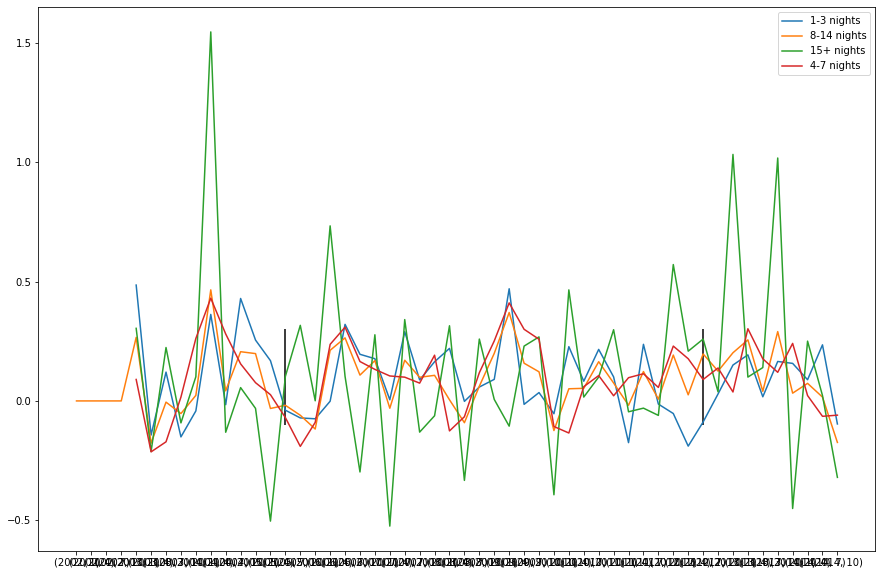

In [21]:
""" 以holiday，为来的时间来为目的的增长率的plot
insight: 奥运会后长期的旅游人数增加
"""
y = london_holiday_visist['visits_rate'].fillna(0).values
y2 = london_holiday_visist['spend_rate'].fillna(0).values
plt.figure(figsize=(15, 10))
plt.plot(index, y1, label='1-3 nights')
plt.plot(index, y2, label='8-14 nights')
plt.plot(index, y3, label='15+ nights')
plt.plot(index, y4, label='4-7 nights')
plt.vlines("(2012, 7)", -0.1, 0.3)
plt.vlines("(2005, 7)", -0.1, 0.3)
plt.legend()

In [22]:
holiday_visist_filter = holiday_visist[holiday_visist.area != 'TOTAL ENGLAND']
holiday_visist_filter = holiday_visist_filter[holiday_visist_filter.area != ' CHANNEL ISLANDS']
holiday_visist_filter = holiday_visist_filter[holiday_visist_filter.area != 'REST OF ENGLAND']
holiday_visist_filter = holiday_visist_filter[holiday_visist_filter.area != ' ISLE OF MAN']
holiday_visist_filter = holiday_visist_filter[holiday_visist_filter.area != ' OIL RIGS/TRAVELLING']
holiday_visist_filter = holiday_visist_filter[holiday_visist_filter.area != 'ALL STAYING VISITS']

In [23]:
holiday_visist_filter.area.unique()

array(['LONDON', 'SOUTHERN ENGLAND', 'SOUTH EAST', 'SCOTLAND',
       'CENTRAL ENGLAND', 'WEST MIDLANDS', 'SOUTH WEST', 'EAST MIDLANDS',
       'WALES', 'EAST OF ENGLAND', "ENGLAND'S NORTH COUNTRY",
       'NORTH EAST', 'YORKSHIRE', ' NORTHERN IRELAND', 'NORTH WEST'],
      dtype=object)

In [24]:
""" 分地区是否存在substitution effect 
south east 和 east of england 是和london临近的
"""
all_holiday_visist = holiday_visist_filter.groupby(['year', 'quarter', 'area'])[['spend', 'visits']].sum()
all_holiday_visist = all_holiday_visist.unstack(level='area')

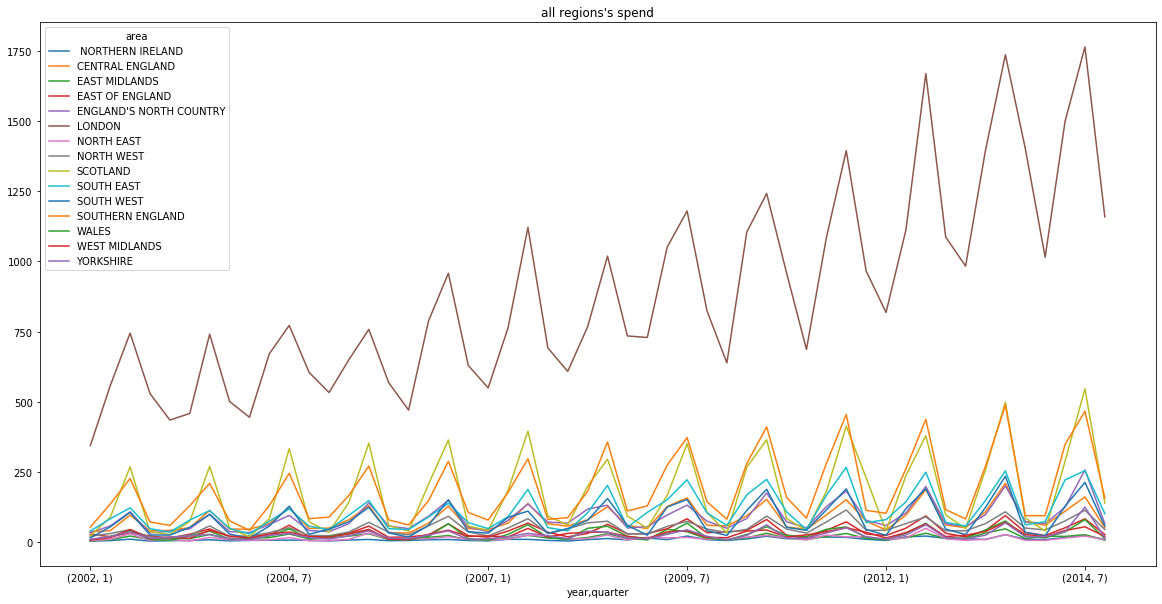

In [25]:
all_holiday_visist['spend'].plot(figsize=(20, 10), title="all regions's spend")

In [26]:
cols = ['LONDON', 'SOUTH EAST', 'EAST OF ENGLAND', 'EAST MIDLANDS', 'WEST MIDLANDS', 'SOUTH WEST']
all_holiday_visist.loc[:, ('spend', 'REST')] = 0
for col in cols:
    all_holiday_visist.loc[:, ('spend', 'REST')] = all_holiday_visist.loc[:, ('spend', 'REST')] + all_holiday_visist['spend'][col]

In [41]:
# y_list = []
# for col in cols:
#     y_list.append(all_holiday_visist['spend'][col].values)
    
# index = list(map(lambda x: str(x), all_holiday_visist.index.values))
# plt.figure(figsize=(15, 10))
# for i, col in enumerate(cols):
#     plt.plot(index, y_list[i], label=col)
# plt.vlines("(2012, 7)", 0, 1000)
# plt.vlines("(2005, 7)", 0, 1000)
# plt.legend()
# plt.title("regional spend")
# plt.show()

<Figure size 1080x720 with 0 Axes>

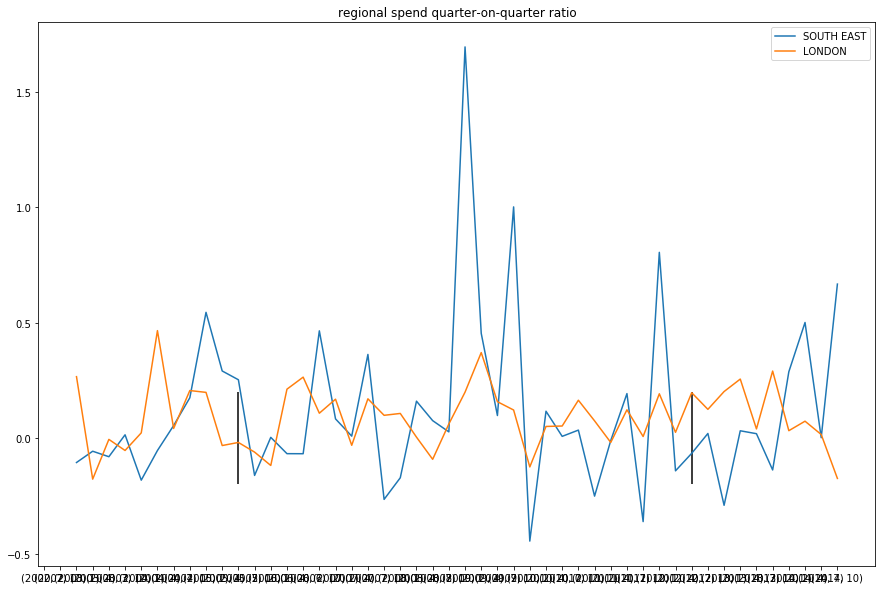

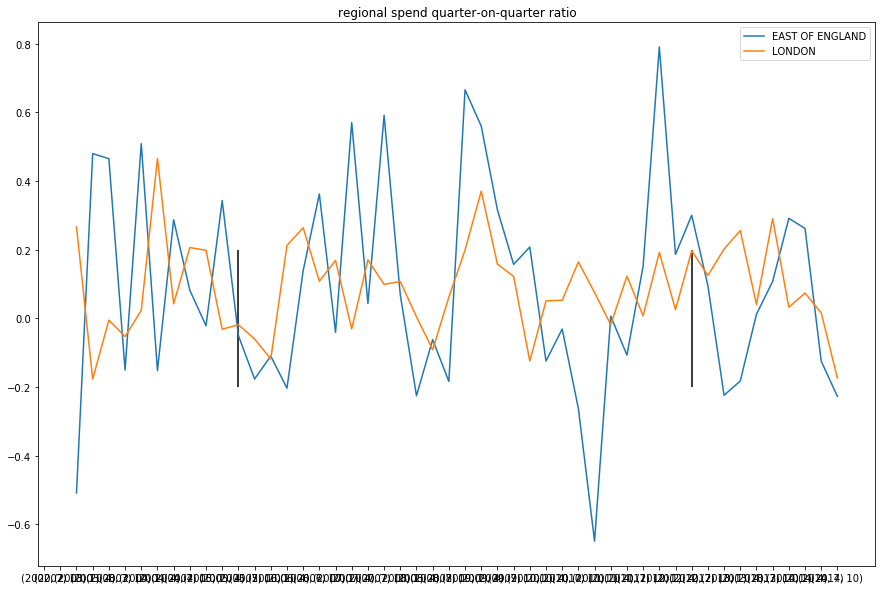

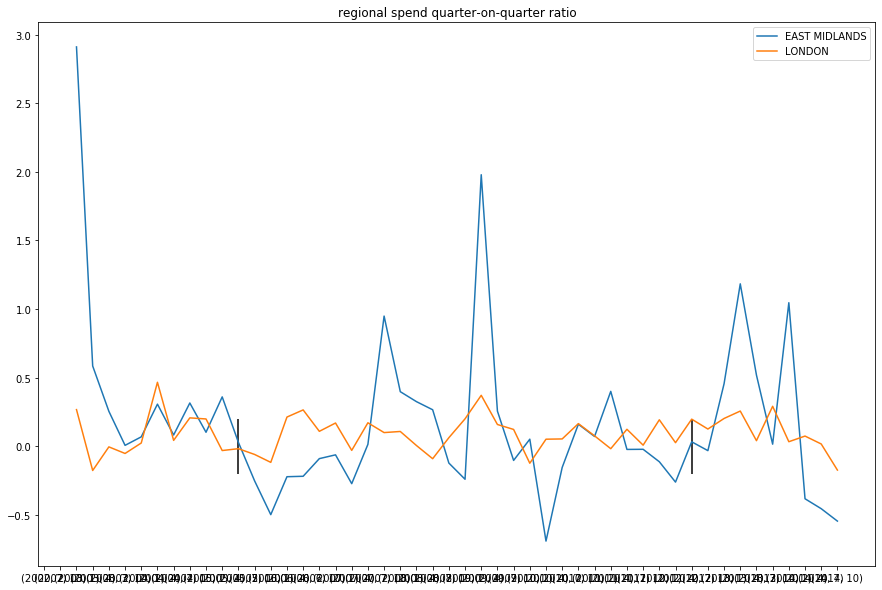

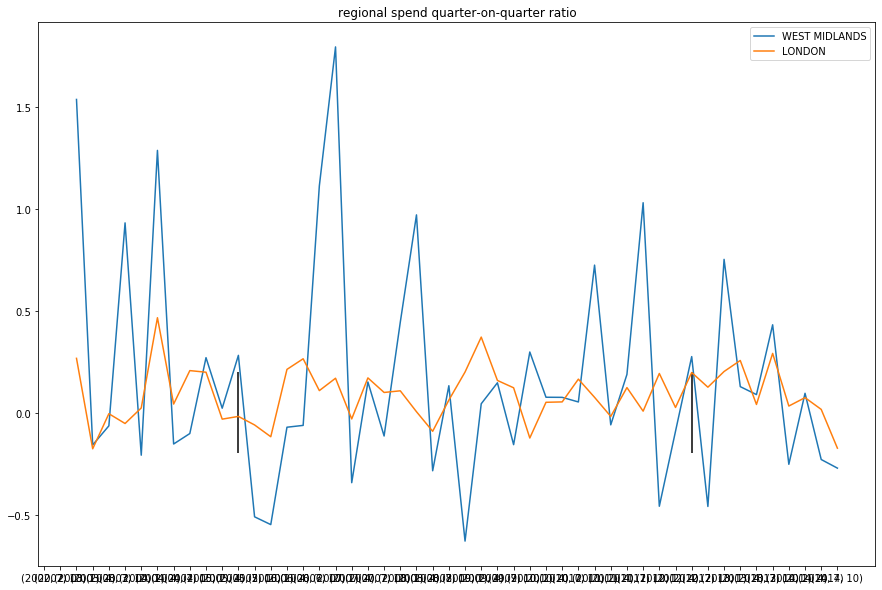

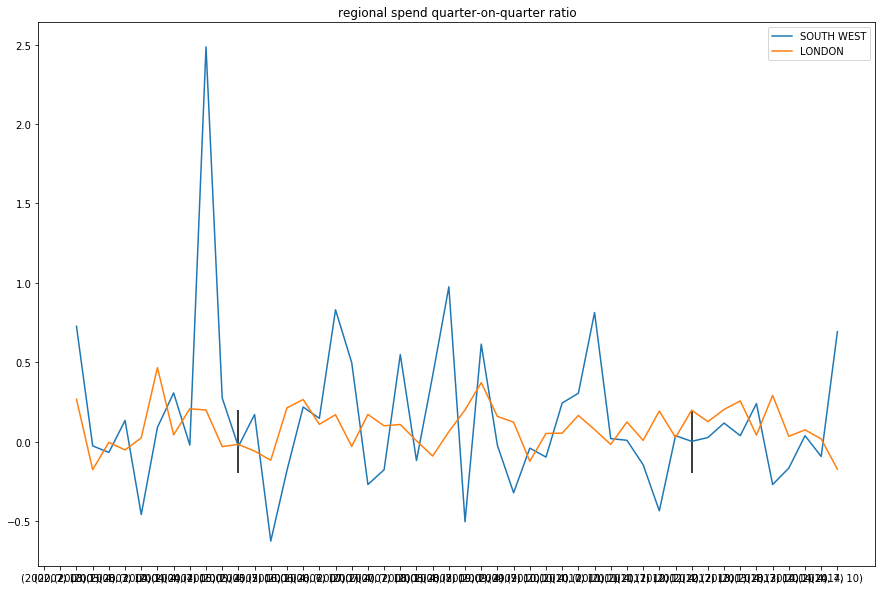

In [28]:
""" 
insight: 希望看到其他的地区会有降低，但是并没有一个很consistent的降低的现象
"""
all_holiday_visist_d = all_holiday_visist.shift(4)
all_holiday_visist_r = all_holiday_visist / all_holiday_visist_d - 1
y_list = []
for col in cols:
    y_list.append(all_holiday_visist_r['spend'][col].values)
    
plt.figure(figsize=(15, 10))
for i, col in enumerate(cols):
    if col == 'LONDON': continue
    plt.figure(figsize=(15, 10))
    plt.plot(index, y_list[i], label=col)
    plt.plot(index, all_holiday_visist_r['spend']['LONDON'].values, label='LONDON')
    plt.vlines("(2012, 7)", -0.2, 0.2)
    plt.vlines("(2005, 7)", -0.2, 0.2)
    plt.legend()
    plt.title("regional spend quarter-on-quarter ratio")
    plt.show()

In [29]:
july_all_holiday_visist = all_holiday_visist[all_holiday_visist.index.get_level_values(level='quarter') == 7]

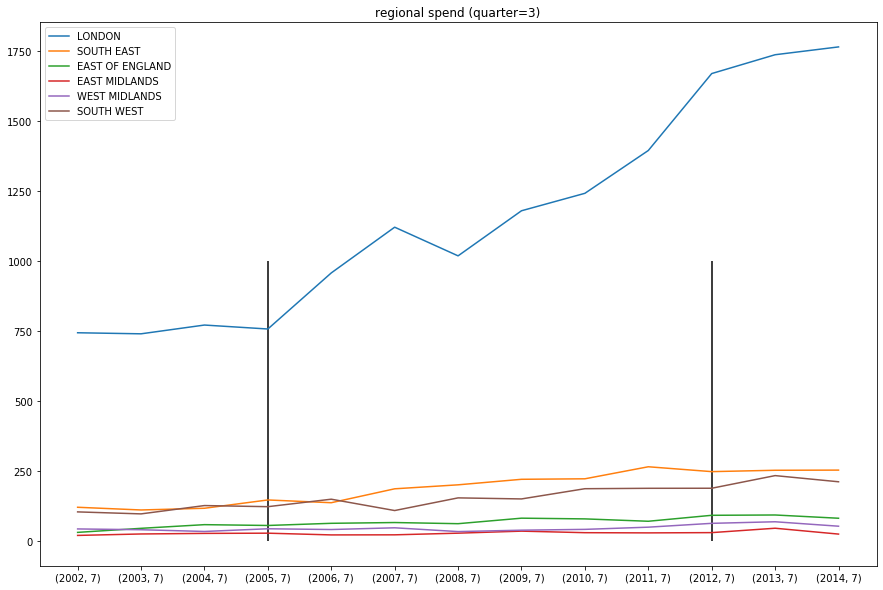

In [30]:
y_list = []
for col in cols:
    y_list.append(july_all_holiday_visist['spend'][col].values)
    
index = list(map(lambda x: str(x), july_all_holiday_visist.index.values))
plt.figure(figsize=(15, 10))
for i, col in enumerate(cols):
    plt.plot(index, y_list[i], label=col)
plt.vlines("(2012, 7)", 0, 1000)
plt.vlines("(2005, 7)", 0, 1000)
plt.legend()
plt.title("regional spend (quarter=3)")
plt.show()

<Figure size 1080x720 with 0 Axes>

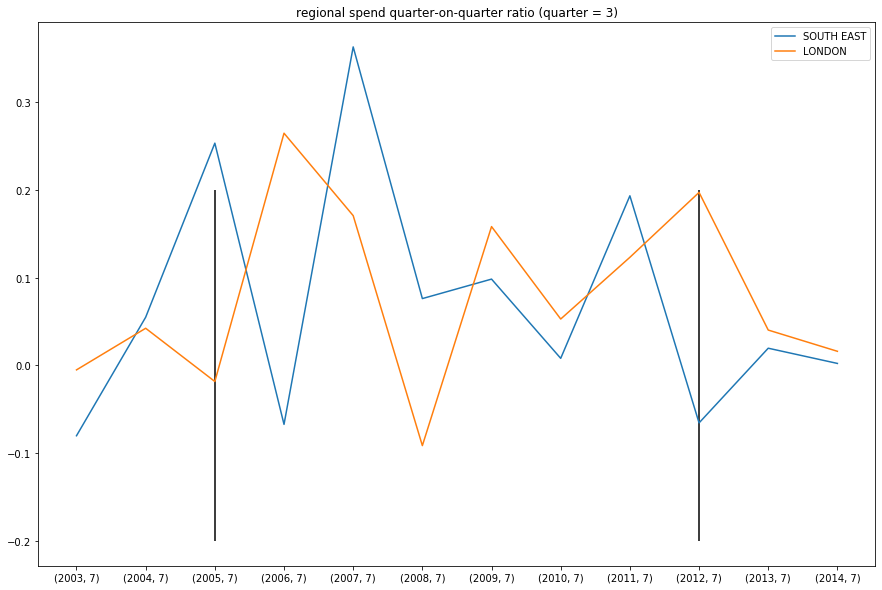

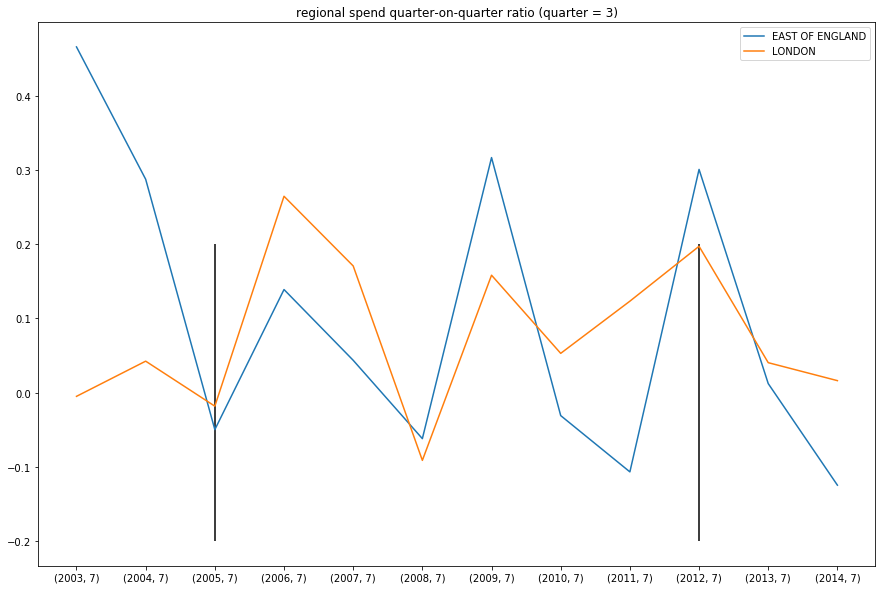

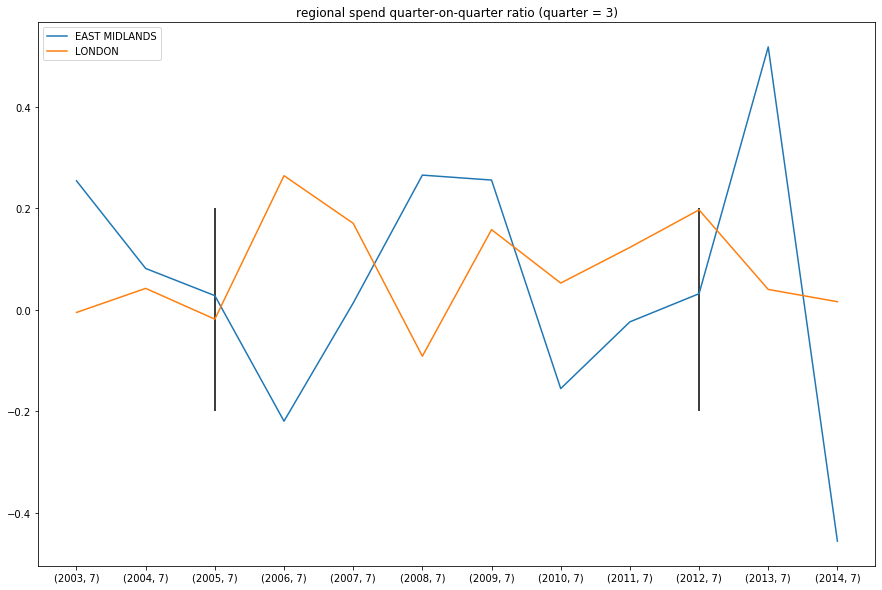

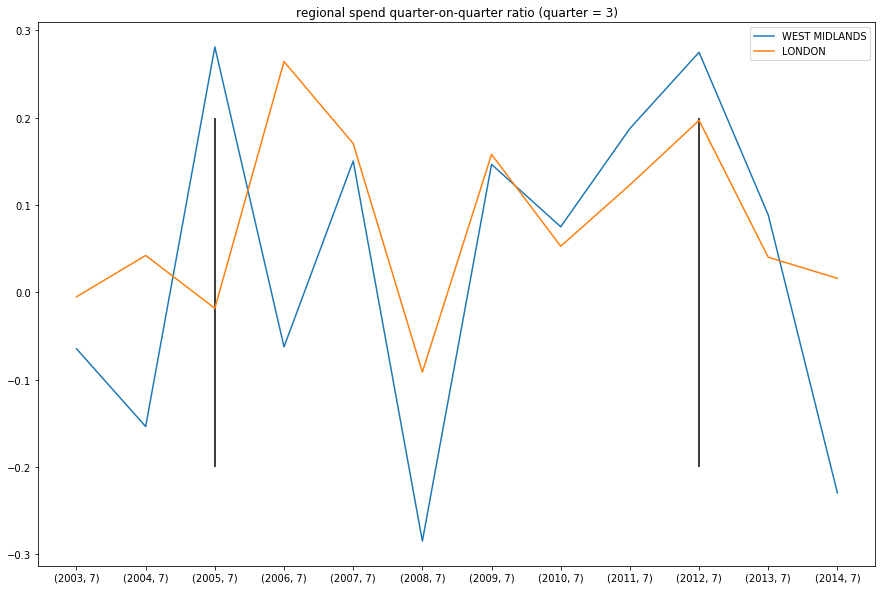

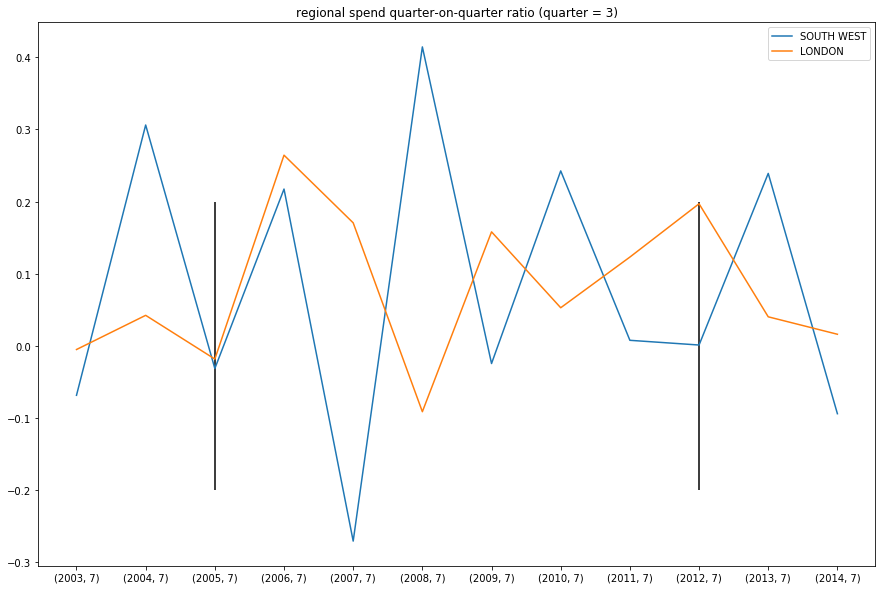

In [33]:
""" 只有第三季度的增速的变化
insight: 希望看到其他的地区会有降低，但是并没有一个很consistent的降低的现象，特别是针对临近LONDON的SOUTH EAST和EAST OF ENGLAND
SOUTH EAST: 增速降低
EAST OF ENGLAND: 增加
EAST MIDLANDS: 增速降低
SOUTH WEST:  没什么现象
WEST MIDLANDS: 没什么现象
SOUTH WEST: 没什么现象
"""
july_all_holiday_visist_d = july_all_holiday_visist.shift(1)
july_all_holiday_visist_r = july_all_holiday_visist / july_all_holiday_visist_d - 1
y_list = []
for col in cols:
    y_list.append(july_all_holiday_visist_r['spend'][col].values)
    
plt.figure(figsize=(15, 10))
for i, col in enumerate(cols):
    if col == 'LONDON': continue
    plt.figure(figsize=(15, 10))
    plt.plot(index, y_list[i], label=col)
    plt.plot(index, july_all_holiday_visist_r['spend']['LONDON'].values, label='LONDON')
    plt.vlines("(2012, 7)", -0.2, 0.2)
    plt.vlines("(2005, 7)", -0.2, 0.2)
    plt.legend()
    plt.title("regional spend quarter-on-quarter ratio (quarter = 3)")
    plt.show()

In [72]:
"""分待得时间的图"""
all_holiday_visist_by_day = holiday_visist_filter.groupby(['year', 'quarter', 'area', 'dur_stay'])[['spend', 'visits']].sum()
all_holiday_visist_by_day = all_holiday_visist_by_day.unstack(level='area').unstack(level='dur_stay')
july_all_holiday_visist_by_day = all_holiday_visist_by_day[all_holiday_visist_by_day.index.get_level_values(level='quarter') == 7]

In [85]:
# sub_cols = ['1-3 nights', '15+ nights', '4-7 nights', '8-14 nights']
sub_cols = ['15+ nights', '8-14 nights', '1-7 nights']
for col in cols:
    july_all_holiday_visist_by_day.loc[:, ('spend', col, '1-7 nights')] =\
    july_all_holiday_visist_by_day.loc[:, ('spend', col)]['1-3 nights'] +\
    july_all_holiday_visist_by_day.loc[:, ('spend', col)]['4-7 nights']

/Users/adam/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/adam/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1048: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/Users/adam/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1762: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._get

<Figure size 1080x720 with 0 Axes>

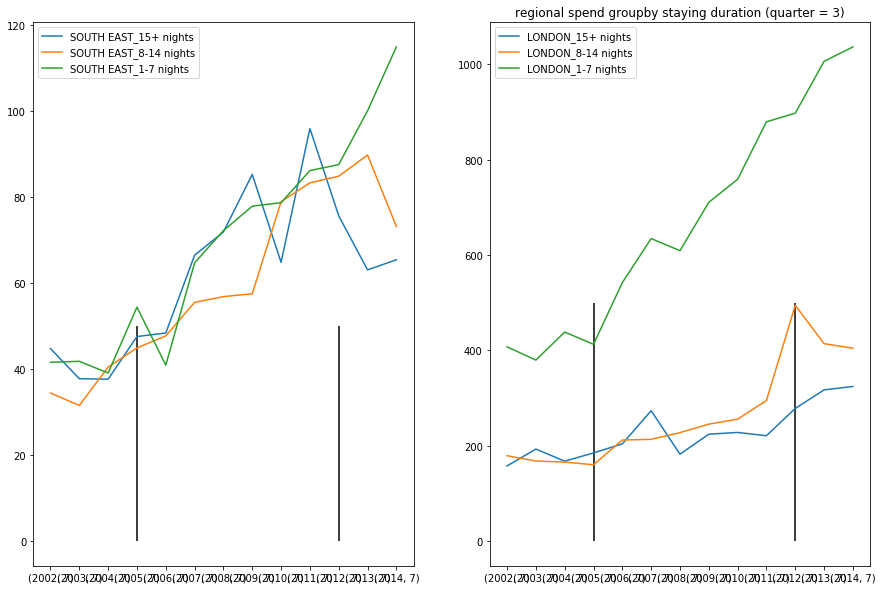

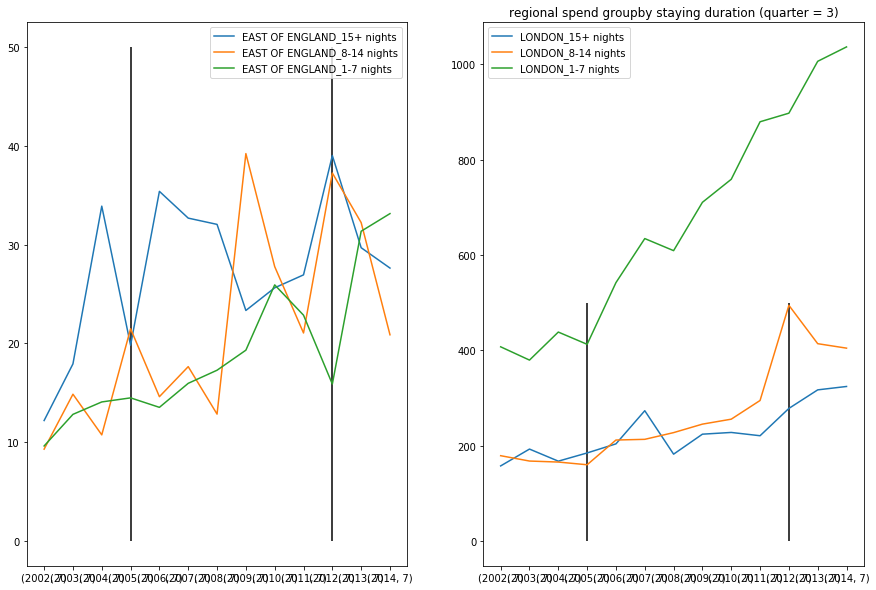

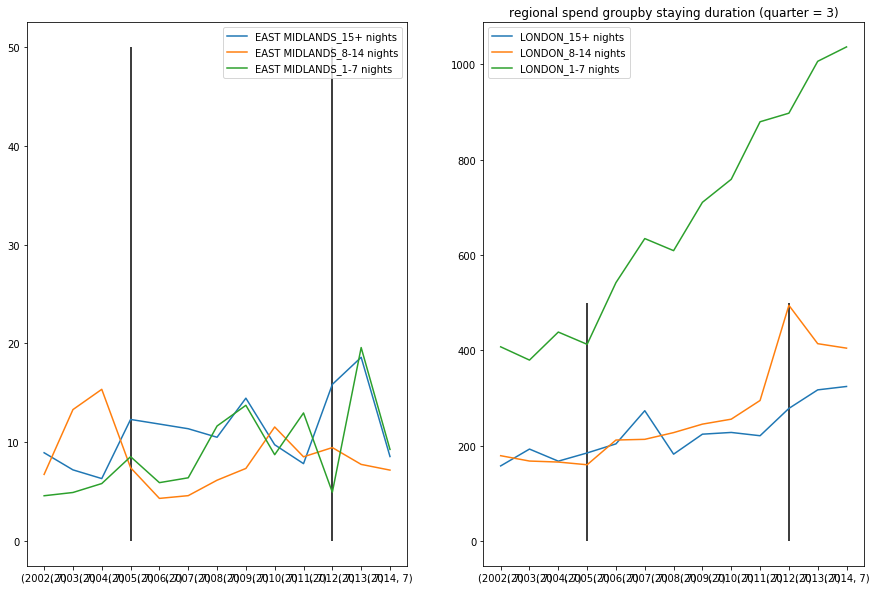

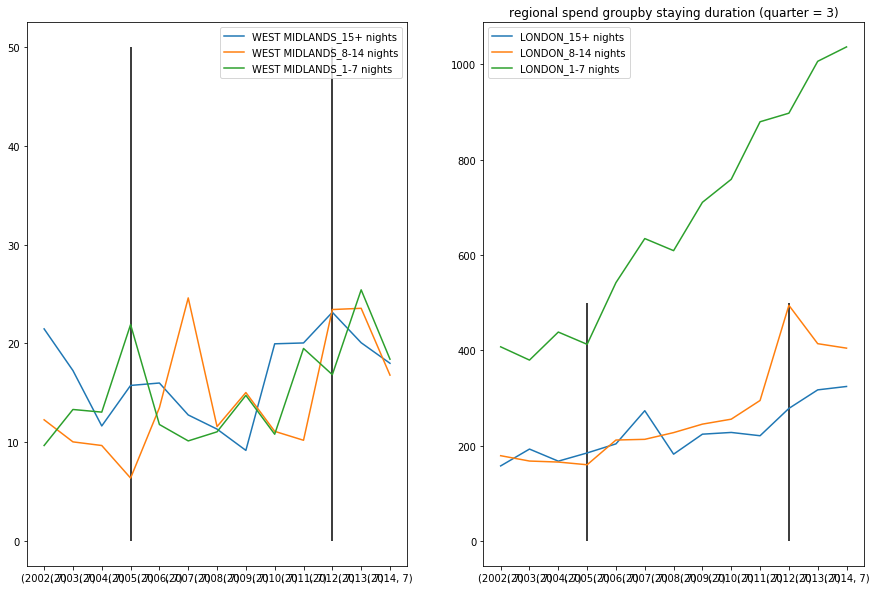

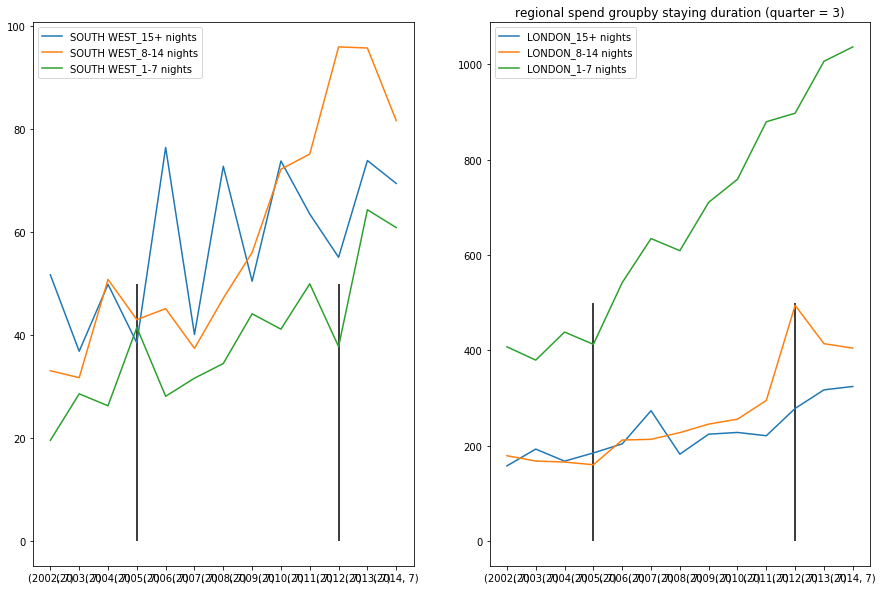

In [87]:
y_list = []
for col in cols:
    y_list.append(july_all_holiday_visist_by_day['spend'][col])
index = list(map(lambda x: str(x), july_all_holiday_visist_by_day.index.values))
plt.figure(figsize=(15, 10))
for i, col in enumerate(cols):
    if col == 'LONDON': continue
    f, axses = plt.subplots(1,2, figsize=(15, 10))
    for sub_col in sub_cols:
        axses[0].plot(index, y_list[i][sub_col], label=col+'_'+sub_col)
        axses[1].plot(index, july_all_holiday_visist_by_day['spend']['LONDON'][sub_col].values, label='LONDON'+'_'+sub_col)
    
    axses[0].vlines("(2012, 7)", 0, 50)
    axses[0].vlines("(2005, 7)", 0, 50)
    axses[1].vlines("(2012, 7)", 0, 500)
    axses[1].vlines("(2005, 7)", 0, 500)
    axses[1].legend()
    axses[0].legend()
    plt.title("regional spend groupby staying duration (quarter = 3)")
    plt.show()

In [36]:
"""
2002 - 2019
分地区的收入，可以分析是否在奥运会期间，工资是否有上涨
"""
london_earnings_by_borough = pd.read_csv(london_root+"london_earnings_by_borough.csv")
london_earnings_by_borough.head()

,year,area_code,area,identity,pay_type,pay,confidence
0,2002,00AA,City of London,Female,Hourly,NaN,NaN
1,2003,00AA,City of London,Female,Hourly,NaN,NaN
2,2004,00AA,City of London,Female,Hourly,NaN,NaN
3,2005,00AA,City of London,Female,Hourly,NaN,NaN
4,2006,00AA,City of London,Female,Hourly,NaN,NaN


In [28]:
london_earnings_by_borough[london_earnings_by_borough['area'] == 'London']['year'].value_counts()

2019    8
2018    8
2003    8
2004    8
2005    8
2006    8
2007    8
2008    8
2009    8
2010    8
2011    8
2012    8
2013    8
2014    8
2015    8
2016    8
2017    8
2002    8
Name: year, dtype: int64

In [32]:
london_earnings_by_borough[np.logical_and(london_earnings_by_borough['area'] == 'London', london_earnings_by_borough['year'] == 2012)]

,year,area_code,area,identity,pay_type,pay,confidence
712,2012,H,London,Female,Hourly,13.68,1.0
1558,2012,H,London,Female,Weekly,460.00,1.3
2404,2012,H,London,Full-time,Hourly,16.00,0.8
3250,2012,H,London,Full-time,Weekly,613.30,0.6
4096,2012,H,London,Male,Hourly,15.42,1.0
4942,2012,H,London,Male,Weekly,589.20,1.0
5788,2012,H,London,Part-time,Hourly,8.98,1.3
6634,2012,H,London,Part-Time,Weekly,161.90,2.0


In [47]:
fulltime_week_pay_london = london_earnings_by_borough[(london_earnings_by_borough['area'] == 'London') &
                                                      (london_earnings_by_borough['pay_type'] == 'Weekly') &
                                                      (london_earnings_by_borough['identity'] == 'Full-time')]

fulltime_week_pay_london = pd.merge(left=fulltime_week_pay_london,
                                   right=inflation,
                                   left_on='year',
                                   right_on='year')

In [49]:
fulltime_week_pay_london['real_pay'] = fulltime_week_pay_london.pay * fulltime_week_pay_london.multiplier

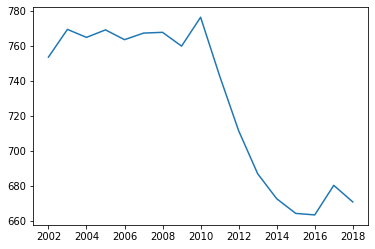

In [53]:
""" 
real wage 反而有降低
"""
plt.plot(fulltime_week_pay_london.year, fulltime_week_pay_london.real_pay)

In [5]:
# """
# 地下铁数据，年级别的数据，不知道是否有用
# """
# london_underground_activity = pd.read_csv(london_root+"london_underground_activity.csv")

# Vancouver
基本没有收入相关的数据

In [9]:
vancourver_root = "../datasets_full/Vancouver/"
vancouver_tourism_indicators = pd.read_csv(vancourver_root+"vancouver_turism_indicators.csv")

In [7]:
# vancouver_tourism_indicators.describe()

In [8]:
# plt.plot(vancouver_tourism_indicators['year'], 
#          vancouver_tourism_indicators['consumption_taxes'])

In [12]:
vancouver_tourism_indicators

,year,revenue,GDP,real_GDP,implicit_price_index,employment,wages_and_salaries,consumption_taxes,employment_vcm,employment_vi,employment_to,employment_nbc,employment_bcr,employment_ccc
0,2000,"9,350","4,679","5,085",91.4,96.7,"2,801",855,"60,600","15,300","9,500","5,400","3,900","2,000"
1,2001,"9,448","4,857","5,102",94.6,104.2,"2,968",861,"67,300","15,700","9,300","5,400","4,500","2,100"
2,2002,"9,754","4,931","5,147",95.2,104.2,"2,927",943,"64,800","17,700","10,400","5,300","4,200","1,800"
3,2003,"9,721","4,703","4,911",95.2,105.8,"2,945",989,"67,200","16,400","11,300","5,100","4,000","1,800"
4,2004,"10,595","5,134","5,195",98.4,107.6,"3,128","1,047","67,100","19,100","11,000","5,200","3,200","2,000"
5,2005,"11,412","5,576","5,527",100.4,110.1,"3,305","1,093","66,300","22,000","11,500","5,400","3,100","1,900"
6,2006,"12,210","5,964","5,682",104.4,114.7,"3,582","1,099","68,500","23,000","11,600","5,300","4,300","2,000"
7,2007,"13,005","6,335","6,335",100.0,118.3,"3,765","1,094","72,900","21,800","12,600","5,300","3,900","1,800"
8,2008,"13,390","6,358","6,332",100.4,122.1,"3,890",993,"73,700","24,000","12,100","5,900","4,500","1,900"
9,2009,"12,499","6,283","6,215",101.1,120.8,"3,807",939,"75,000","22,200","12,000","5,800","4,000","1,800"


In [13]:
# vancouver_employment_by_industry = pd.read_csv(vancourver_root+"vancouver_employment_by_industry.csv")

In [14]:
# """
# 需要知道中标的时间 2003
# 需要结合industry，来看2012年前后是否会存在异象
# """
# vancouver_employment_by_industry["industry_code"].value_counts()

# Rio
数据有 income相关的季度数据

旅客的月度数据

In [19]:
""" 2016 8月份, Q3"""
root = "../datasets_full/Rio/"
brazil_monthly_income = pd.read_csv(root + "brazil_monthly_income.csv")
brazil_monthly_income.head()

,year,quarter,job_type,state,value
0,2012,Q1,Directors and managers,Rondônia,2232.0
1,2012,Q1,Directors and managers,Acre,3048.0
2,2012,Q1,Directors and managers,Amazonas,3787.0
3,2012,Q1,Directors and managers,Roraima,3450.0
4,2012,Q1,Directors and managers,Pará,2455.0


In [20]:
brazil_monthly_income['job_type'].value_counts()

Ill-defined occupations                                                           891
Skilled workers, construction workers and artisans, mechanics and other crafts    891
Elementary occupations                                                            891
Science and intellection professions                                              891
Directors and managers                                                            891
Service workers, sellers of trades and markets                                    891
Skilled workers in agriculture, forestry, hunting and fishing                     891
Members of the armed forces, police and military firefighters                     891
Midlevel technicians and professionals                                            891
Plant and machine operators and assemblers                                        891
Administrative support workers                                                    891
Name: job_type, dtype: int64

In [21]:
rio_income = brazil_monthly_income[brazil_monthly_income.state == "Rio de Janeiro"]


In [24]:
" 最接近的可以做的分job_type来分析影响 "
all_income = rio_income.groupby(["year", "quarter", 'job_type'])['value'].sum()
all_income = all_income.unstack(level='job_type')


In [63]:
all_income['Oly'] = 0
all_income['Oly'].loc[(2016, 'Q3')] = 1000
cols = list(all_income.columns)
cols.remove('Ill-defined occupations')
cols.remove('Directors and managers')
cols.remove('Members of the armed forces, police and military firefighters')
cols.remove('Midlevel technicians and professionals')
cols.remove('Science and intellection professions')

/Users/adam/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


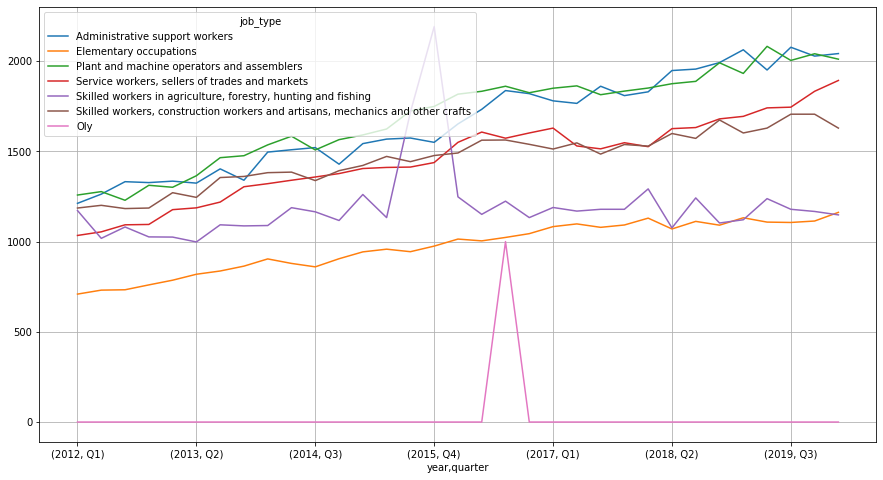

In [156]:
ax = all_income[cols].plot(figsize=(15, 8), grid=True)

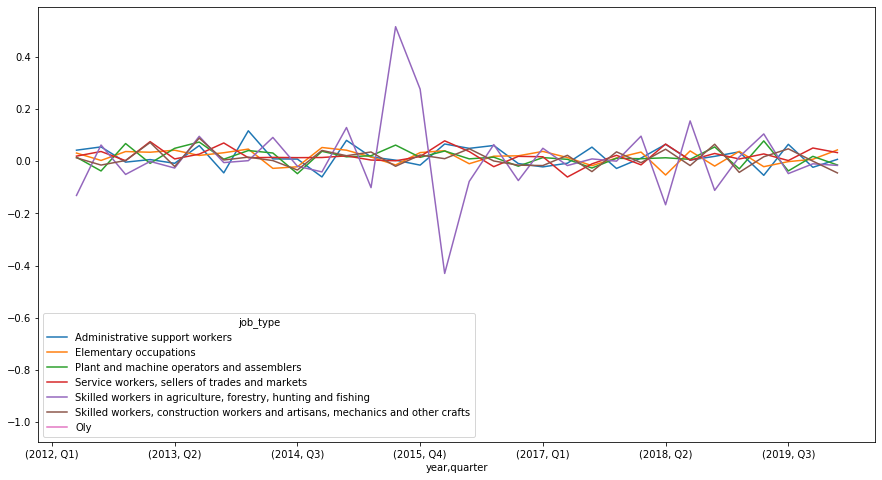

In [65]:
rate = all_income.pct_change(1)
rate[cols].plot(figsize=(15, 8))

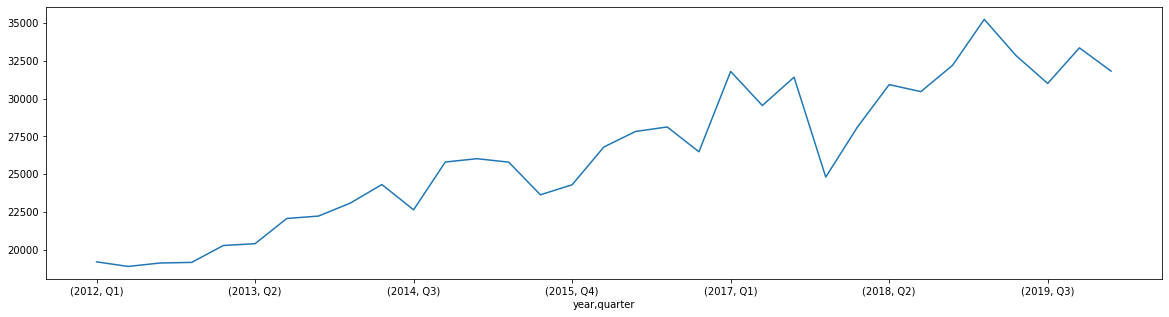

In [87]:
""" 2016 q3 短期增长，然后下降 """
all_income.plot(figsize=(20, 5))

In [140]:
brazil_international_arrivals = pd.read_csv(root+"brazil_international_arrivals.csv")
brazil_international_arrivals['value'] = brazil_international_arrivals['value'].map(lambda x: float(x.replace(",", "")) if isinstance(x, str) else x)

In [141]:
brazil_international_arrivals = brazil_international_arrivals.groupby(['year', 'month'])['value'].sum()

In [142]:
brazil_international_arrivals = brazil_international_arrivals[brazil_international_arrivals.index.get_level_values(0) > 2005]

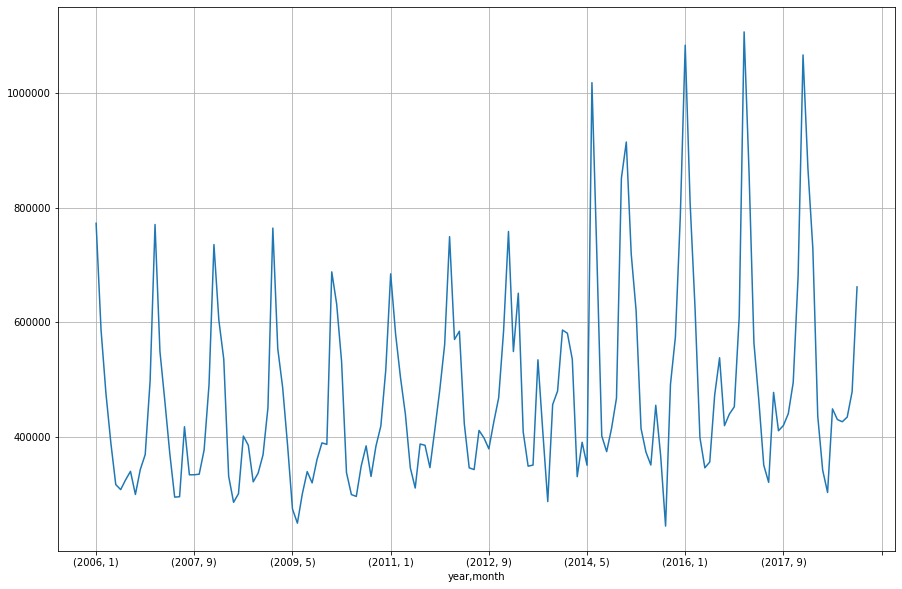

In [149]:
brazil_international_arrivals.plot(figsize=(15, 10), grid=True)

In [144]:
from statsmodels.regression.linear_model import OLS

In [152]:
df = brazil_international_arrivals.to_frame().reset_index()
x_cols = []
for i in [12, 1, 2]:
    df["month_"+str(i)] = (df['month'] == i).astype(int)
    x_cols.append("month_"+str(i))

In [153]:
X = df[x_cols]
X['constant'] = 1
y = df['value']
model = OLS(y, X)
results = model.fit()
results.summary()

/Users/adam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     64.86
Date:                Thu, 16 Jul 2020   Prob (F-statistic):           4.64e-27
Time:                        21:31:42   Log-Likelihood:                -2039.3
No. Observations:                 156   AIC:                             4087.
Df Residuals:                     152   BIC:                             4099.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
month_12    1.815e+05   3.41e+04      5.325      0.000    1.14e+05    2.49e+05
month_1     4.137e+05   3.41e+04     12.137      0.000    3.46e+05    4.81e+05
month_2     2.397e+05   3.41e+04      7.032      0.000    1.72e+05    3.07e+05
constant    4.078e+05   1.08e+04     37.839      0.000    3.87e+05    4.29e+05
==============================================================================
Omnibus:                       64.428   Durbin-Watson:                   1.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.626
Skew:                           1.619   Prob(JB):                     8.21e-46
Kurtosis:                       7.632   Cond. No.                         4.09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [154]:
resid = results.resid
resid.index = brazil_international_arrivals.index

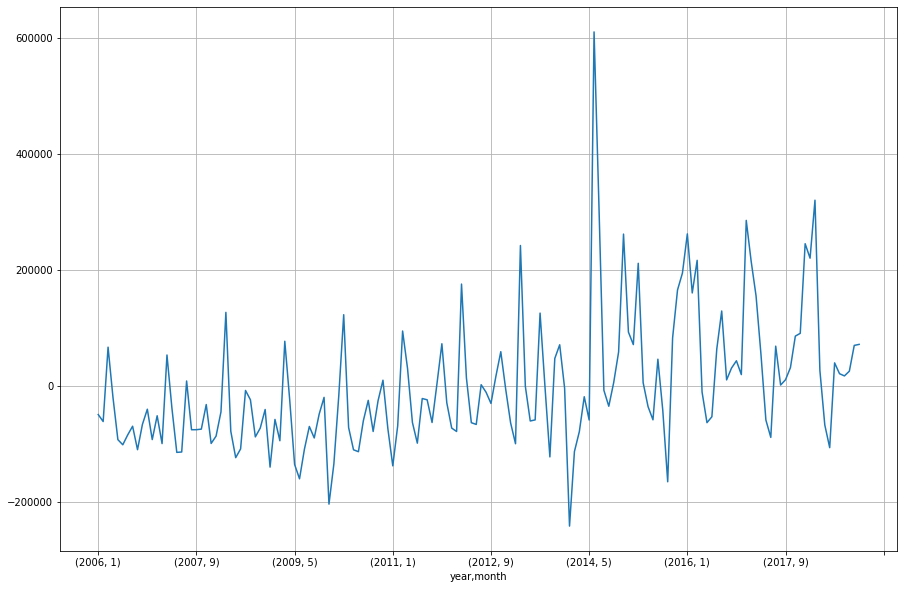

In [155]:
resid.plot(figsize=(15, 10), grid=True)